# TarDAL online tutorial | CVPR 2022

This is the **official** TarDAL notebook, and is freely available for everyone.
For more information please visit [GitHub Repository](https://github.com/JinyuanLiu-CV/TarDAL).
Thank you!

## Setup Environment

Install requirements for TarDAL.

In [2]:
!nvidia-smi  # check GPU environment
!git clone https://github.com/JinyuanLiu-CV/TarDAL.git  # clone repository from GitHub
% cd TarDAL
% pip install -r requirements.txt  # install tardal requirements
% pip install -r module/detect/requirements.txt # install yolov5 requirements

Mon Mar  6 15:40:35 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.161.03   Driver Version: 470.161.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:04:00.0  On |                  N/A |
| 40%   34C    P5    41W / 350W |   1115MiB / 24245MiB |     27%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

: 

## Fuse or Eval

### Load Image (List)

infrared image(s):
![infrared](data/sample/s1/ir/M3FD_00471.png)

visible image(s):
![infrared](data/sample/s1/vi/M3FD_00471.png)

### Init TarDAL Pipeline

2023-03-06 16:05:52,328 | infer_f.py[line:21] | INFO | TarDAL-v1 Inference Script
2023-03-06 16:05:52,328 | infer_f.py[line:38] | INFO | create save folder runs/sample/s1
2023-03-06 16:05:52,329 | dronevehicle.py[line:27] | INFO | load 369 images from dronevehicle
2023-03-06 16:05:52,333 | checker.py[line:21] | INFO | find all images on list
2023-03-06 16:05:52,334 | checker.py[line:73] | INFO | find suitable size for prediction


<class 'loader.dronevehicle.DroneVehicle'>


finding suitable size: 100%|██████████| 369/369 [00:01<00:00, 232.43it/s]
2023-03-06 16:05:53,923 | checker.py[line:80] | INFO | max size in dataset: H:712 x W:840
2023-03-06 16:05:53,957 | fuse.py[line:33] | INFO | deploy tardal-fuse on device cuda
2023-03-06 16:05:53,967 | fuse.py[line:40] | INFO | init generator with (dim: 32 depth: 3)
2023-03-06 16:05:53,967 | fuse.py[line:58] | INFO | download pretrained parameters from https://github.com/JinyuanLiu-CV/TarDAL/releases/download/v1.0.0/tardal-ct.pth
2023-03-06 16:05:53,971 | fuse.py[line:90] | WARNING | no use_eval settings found, using default (true)
100%|███████████████████████████████████████████████████████████████████████████████████| 47/47 [00:18<00:00,  2.51it/s]


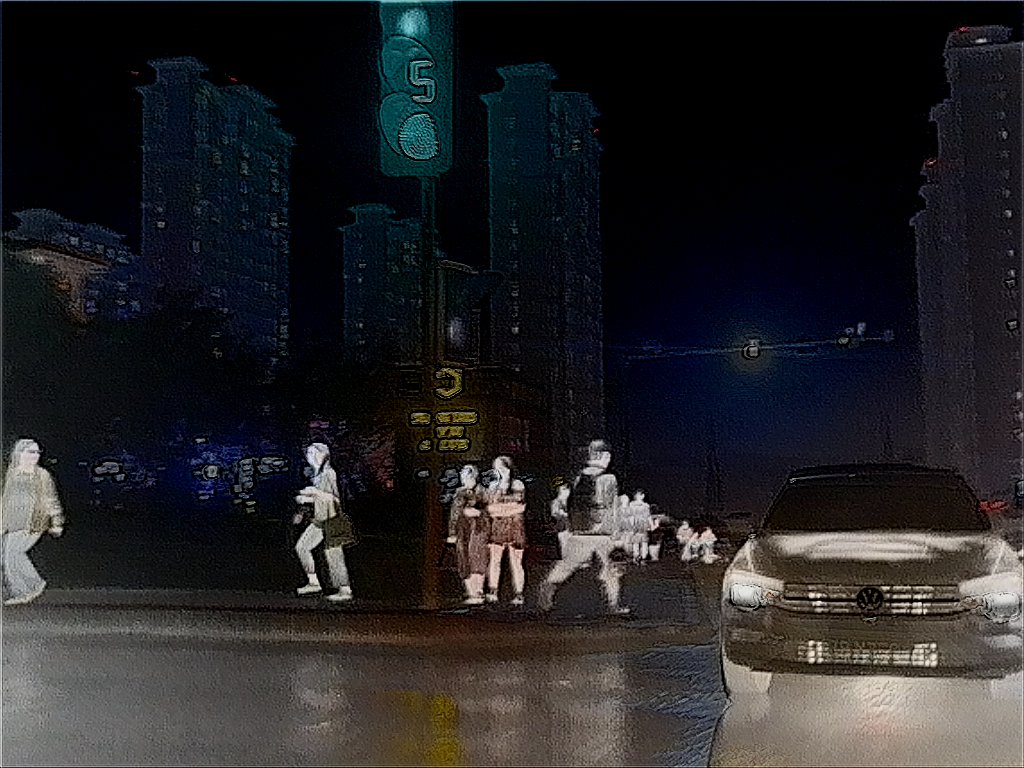

In [1]:
from scripts import InferF
from config import from_dict
import yaml
from pathlib import Path
from IPython import display

# init config
config = yaml.safe_load(Path('config/myexp/colab.yaml').open('r'))
config = from_dict(config)  # convert dict to object

# init infer pipeline
infer_p = InferF(config, save_dir='runs/sample/s1')

# generate fusion sample
infer_p.run()

# display sample
display.Image('runs/sample/s1/M3FD_00471.png')